In [1]:
import os
import datetime


In [2]:
print('Inicializado Rotina json_collect.py.')
os.chdir(sys.path[0])
# os.chdir(os.path.join(os.getcwd(),"json_collect.py"))                  # Modifica o diretório de trabalho, para os caminhos relativos funcionar. (https://stackoverflow.com/questions/1432924/python-change-the-scripts-working-directory-to-the-scripts-own-directory)
# print(os.getcwd())
%run ./json_collect.py                      


Inicializado Rotina json_collect.py.


In [3]:
# sites: https://dadosabertos.bcb.gov.br/dataset/expectativas-mercado
# Sintase: https://dadosabertos.bcb.gov.br/dataset/expectativas-mercado/resource/d420a704-75a7-4f45-8f4b-0fca813c70f0
# documentação: https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/documentacao

In [4]:
df_selic_data=pd.read_csv('./input/selic_datas.csv',index_col='Reuniao')
df_selic=pd.read_csv('./output/selic_data_df.csv',index_col='Reuniao')
df_selic=df_selic.drop(columns=['Unnamed: 0','Indicador'])
df_selic['Data']=df_selic.apply(lambda x: datetime.datetime.strptime(x.Data,'%Y-%m-%d').date(),axis=1)

df_selic['data_reuniao']=''
for i in range(0, len(df_selic)):
    busca_data=''
    try:
        busca_data=df_selic_data.loc[df_selic.index[i],'data_reuniao']
        busca_data=datetime.datetime.strptime(busca_data,'%Y-%m-%d').date()
        df_selic.loc[df_selic.index[i],'data_reuniao']=busca_data

    except:
        # será definida um expectativa para a data.
        # busca_data=df_selic_data.loc[df_selic.index[i],'data_reuniao']
        # df_selic.loc[df_selic.index[i],'data_reuniao']=busca_data
        continue

# df_selic['data_reuniao']=df_selic.apply(lambda x: datetime.datetime.strptime(x.data_reuniao,'%Y-%m-%d').date(),axis=1)
# df_selic=df_selic[df_selic['data_reuniao']!='']
df_selic=df_selic.sort_values(by=['Data','data_reuniao','baseCalculo'],ascending=[False,True,False])
df_selic=df_selic[df_selic['baseCalculo']==1]           # não sei qual é a diferença da base de cálculo.
df_selic.head(20)

,Data,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo,data_reuniao
Reuniao,,,,,,,,,
R5/2022,2022-07-29,13.7355,13.750,0.0698,13.25,13.75,86,1,2022-08-03
R6/2022,2022-07-29,13.9012,14.000,0.1800,13.50,14.25,86,1,2022-09-21
R7/2022,2022-07-29,13.9302,14.000,0.2178,13.50,14.75,86,1,2022-10-26
R8/2022,2022-07-29,13.9302,14.000,0.2178,13.50,14.75,86,1,2022-12-07
R1/2023,2022-07-29,13.8839,13.875,0.2846,12.75,14.75,84,1,2023-02-01
R2/2023,2022-07-29,13.8214,13.750,0.4129,11.75,14.75,84,1,2023-03-22
R3/2023,2022-07-29,13.6637,13.750,0.5982,11.00,14.75,84,1,2023-05-03
R4/2023,2022-07-29,13.3155,13.500,0.7726,10.50,14.75,84,1,2023-06-21
R5/2023,2022-07-29,12.7976,13.000,0.8569,10.50,14.50,84,1,2023-08-02


In [15]:
# Expectativa mais atual

df_selic_ultima=df_selic[df_selic['Data']==df_selic['Data'].max()]
df_selic_ultima.to_csv('./output/selic_ultima_expectativa.csv')
df_selic_ultima

,Data,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo,data_reuniao
Reuniao,,,,,,,,,
R5/2022,2022-07-29,13.7355,13.750,0.0698,13.25,13.75,86,1,2022-08-03
R6/2022,2022-07-29,13.9012,14.000,0.1800,13.50,14.25,86,1,2022-09-21
R7/2022,2022-07-29,13.9302,14.000,0.2178,13.50,14.75,86,1,2022-10-26
R8/2022,2022-07-29,13.9302,14.000,0.2178,13.50,14.75,86,1,2022-12-07
R1/2023,2022-07-29,13.8839,13.875,0.2846,12.75,14.75,84,1,2023-02-01
R2/2023,2022-07-29,13.8214,13.750,0.4129,11.75,14.75,84,1,2023-03-22
R3/2023,2022-07-29,13.6637,13.750,0.5982,11.00,14.75,84,1,2023-05-03
R4/2023,2022-07-29,13.3155,13.500,0.7726,10.50,14.75,84,1,2023-06-21
R5/2023,2022-07-29,12.7976,13.000,0.8569,10.50,14.50,84,1,2023-08-02


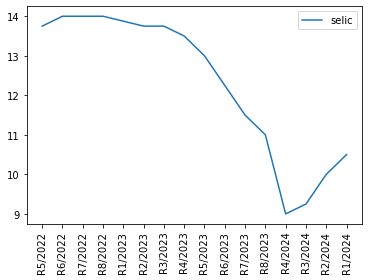

In [14]:
import matplotlib.pyplot as plt
plt.plot(df_selic_ultima.index, df_selic_ultima['Mediana'], label='selic')
plt.xticks(rotation=90)
plt.legend()
plt.show()
